# Transfer Learning

- for VGG, we get rid of all 3 final dense layers to use feature extraction


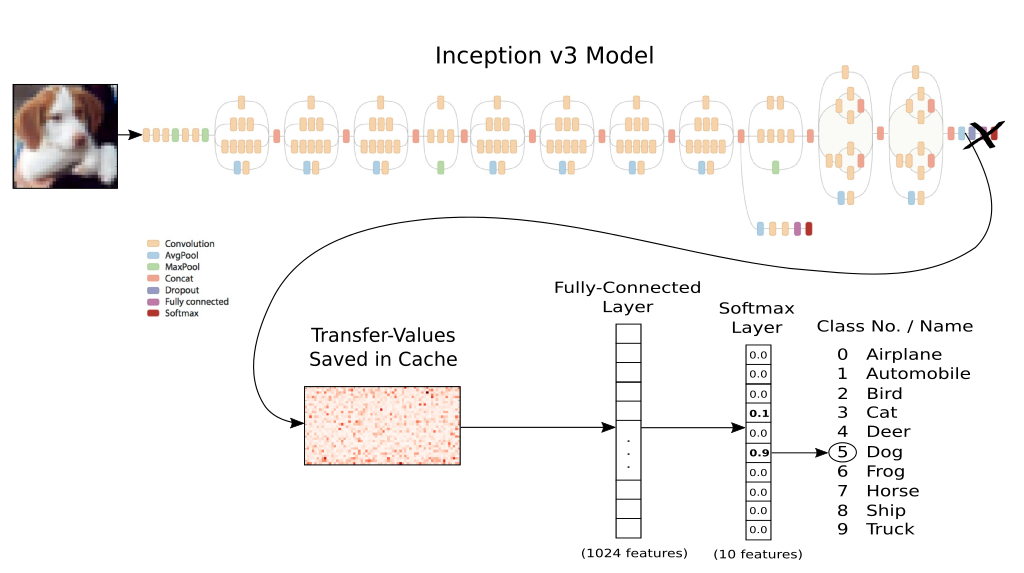

In [1]:
from IPython.display import Image, display
Image('pictures/08_transfer_learning_flowchart.png')

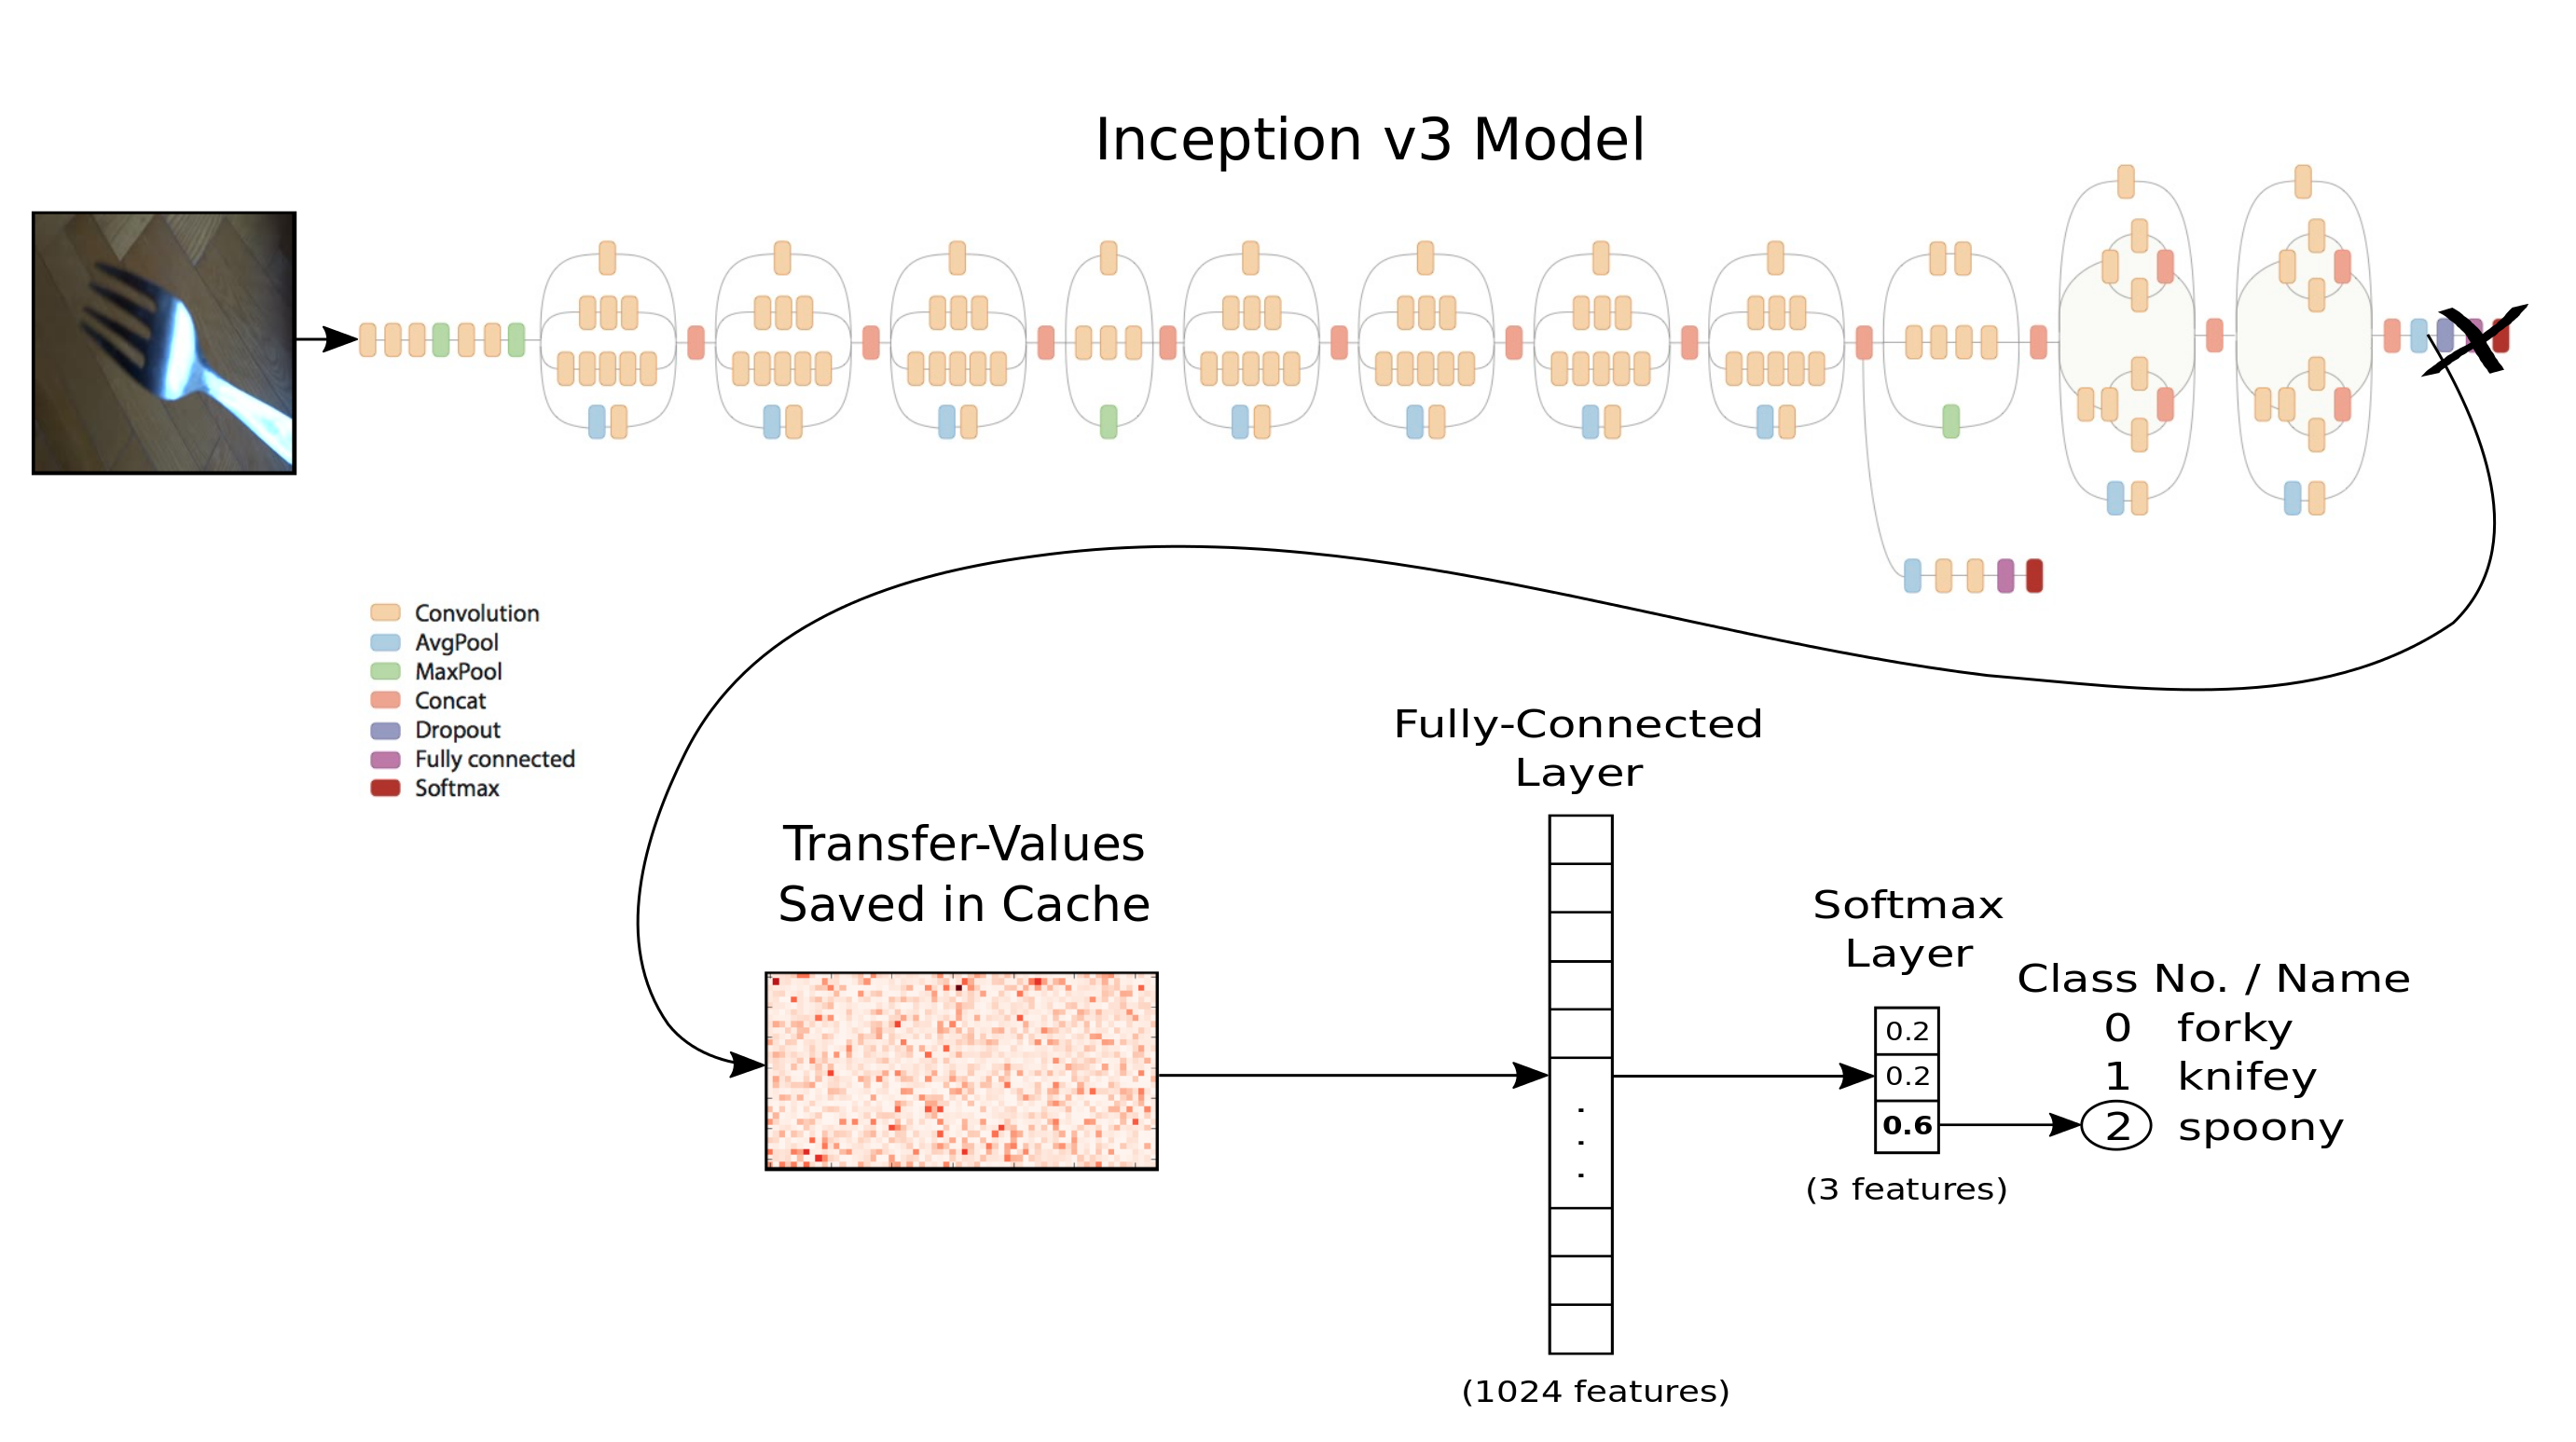

In [2]:
from IPython.display import Image, display
Image('pictures/09_transfer_learning_flowchart.png')

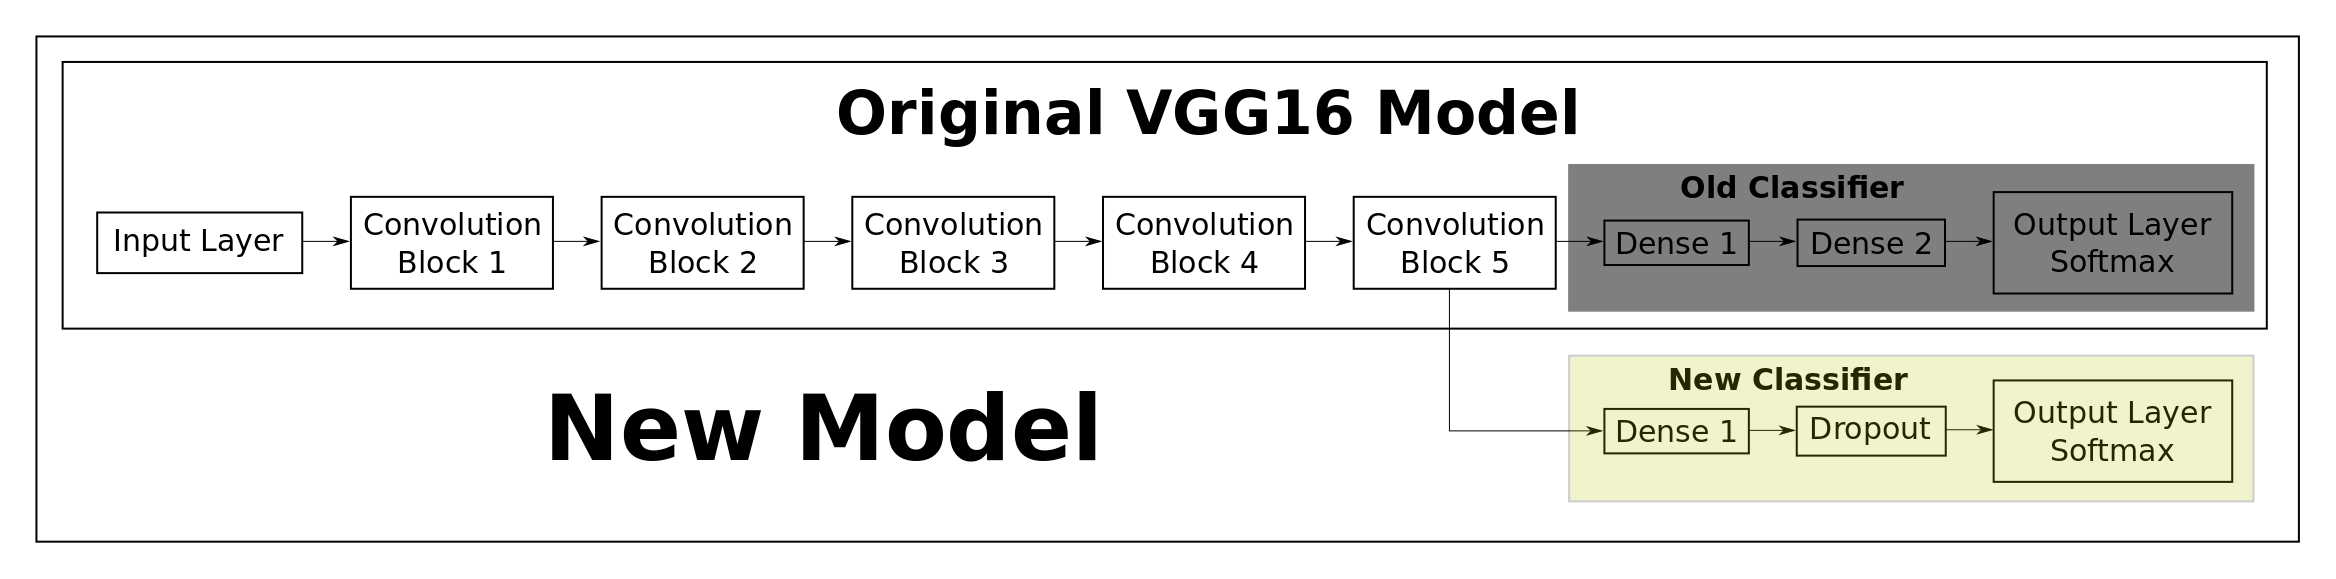

In [3]:
from IPython.display import Image, display
Image('pictures/10_transfer_learning_flowchart.png')

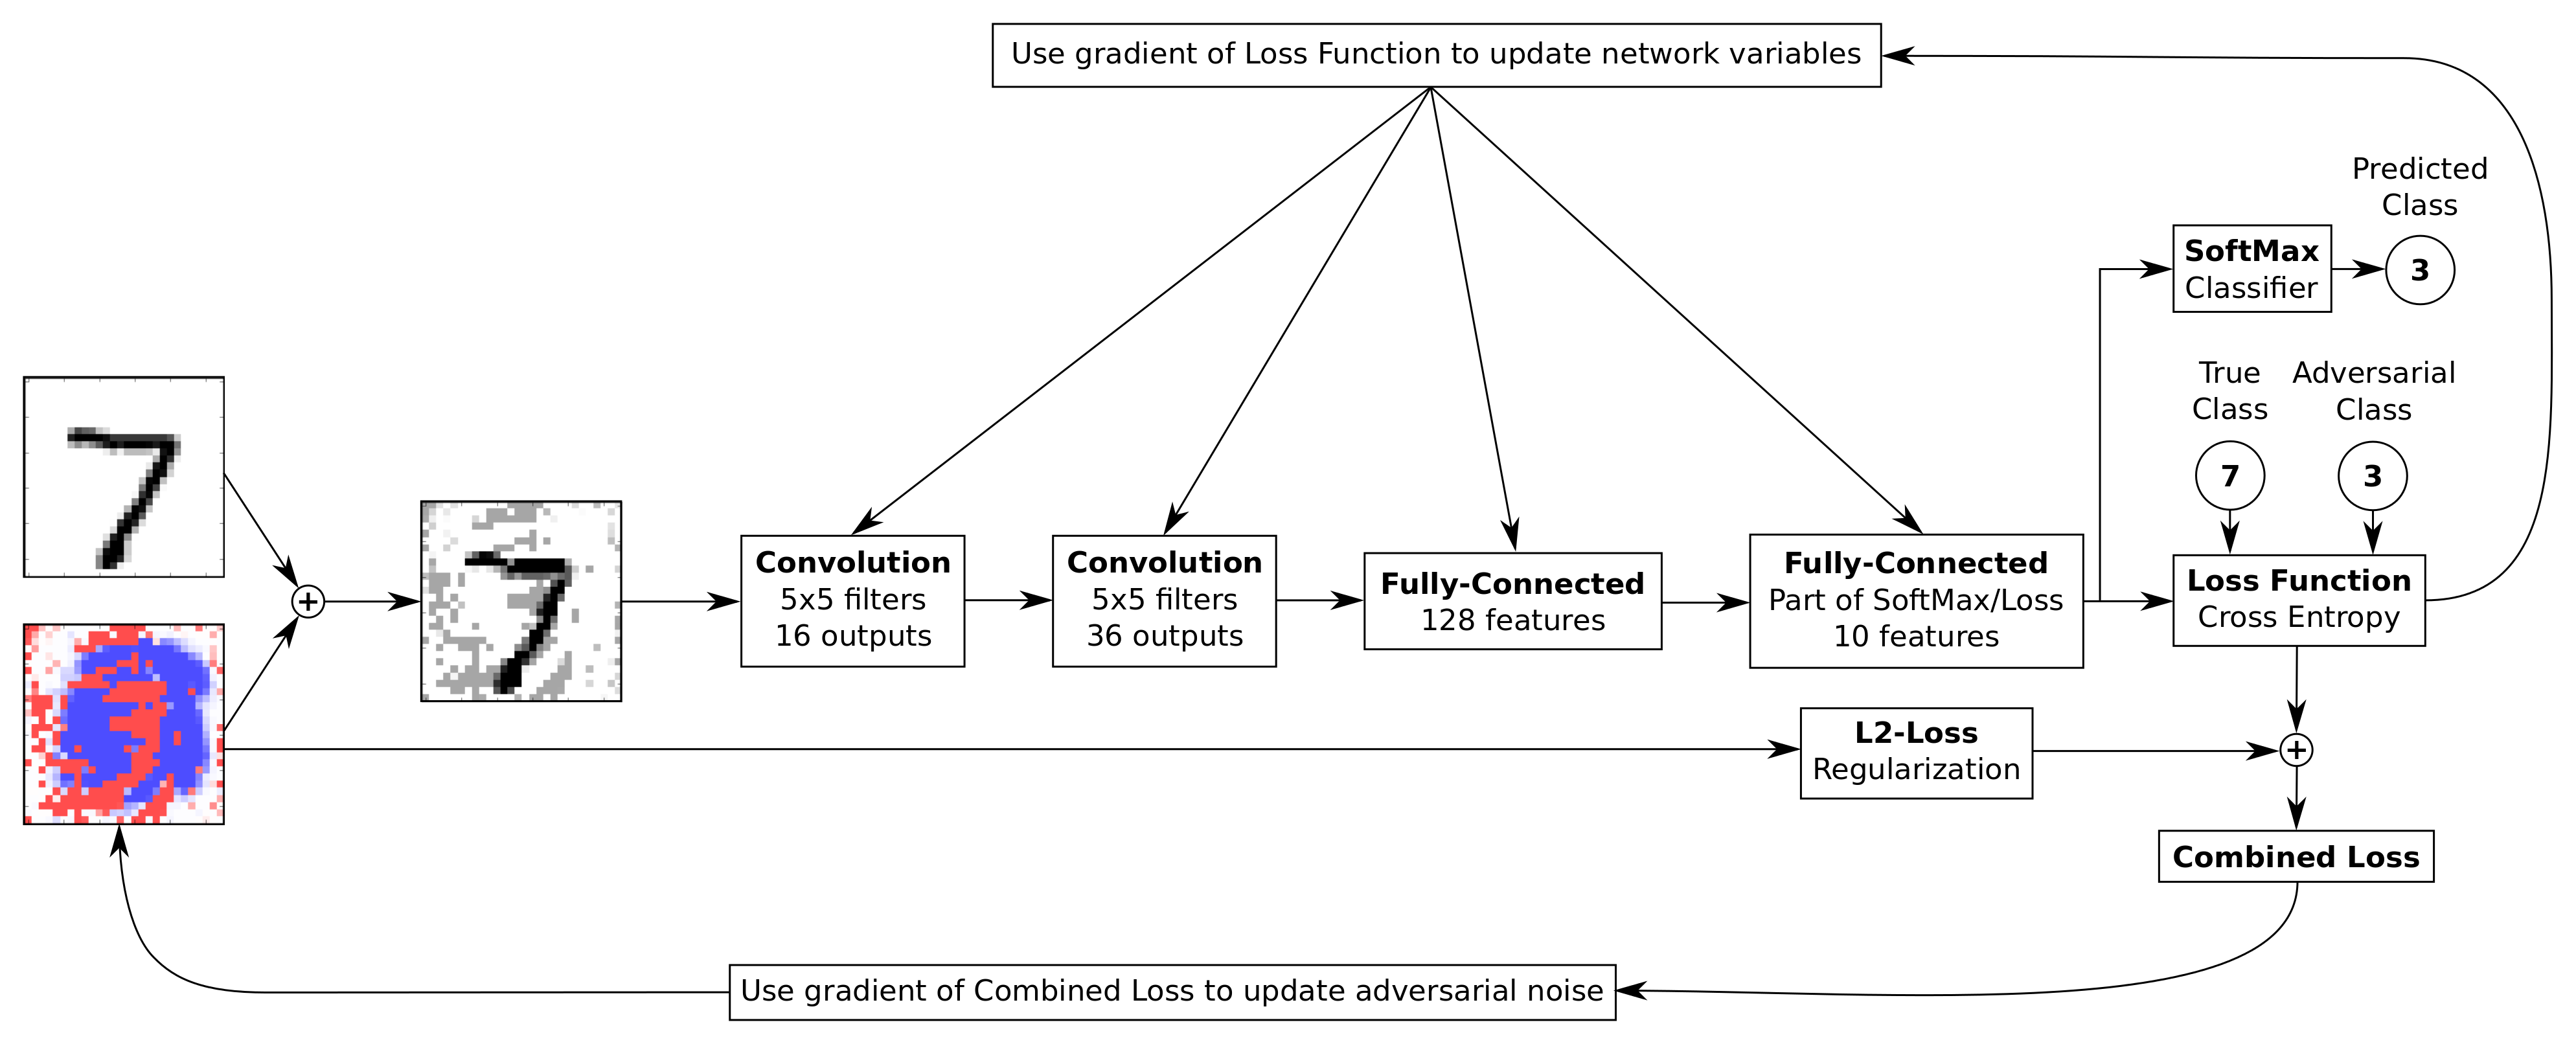

In [5]:
from IPython.display import Image, display
Image('pictures/12_adversarial_noise_flowchart.png')

# Greedy Layer -wise pre-training

[How to Use Greedy Layer-Wise Pretraining in Deep Learning Neural Networks](https://machinelearningmastery.com/greedy-layer-wise-pretraining-tutorial/)  


In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from glob import glob


# re-size all the images to this
IMAGE_SIZE = [100, 100] # feel free to change depending on dataset

# training config:
epochs = 5
batch_size = 32

In [ ]:
train_path = '../large_files/fruits-360-small/Training'
valid_path = '../large_files/fruits-360-small/Validation'

# useful for getting number of files
image_files = glob(train_path + '/*/*.jp*g')
valid_image_files = glob(valid_path + '/*/*.jp*g')

# useful for getting number of classes
folders = glob(train_path + '/*')


In [ ]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [6]:
IMAGE_SIZE = [100, 100] + [3]
IMAGE_SIZE

[100, 100, 3]

In [ ]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False


In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)


In [ ]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()


In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='rmsprop',
  metrics=['accuracy']
)


In [ ]:
# Augmentation
# create an instance of ImageDataGenerator
gen = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  preprocessing_function=preprocess_input
)

In [ ]:
# create generators
train_generator = gen.flow_from_directory(
  train_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)
valid_generator = gen.flow_from_directory(
  valid_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)



In [ ]:
# fit the model
r = model.fit_generator(
  train_generator,
  validation_data=valid_generator,
  epochs=epochs,
  steps_per_epoch=len(image_files) // batch_size,
  validation_steps=len(valid_image_files) // batch_size,
)



## confusion_matrix
![](https://ekababisong.org/assets/ieee_ompi/confusion_matrix.png)  
![](https://www.harrisgeospatial.com/docs/html/images/Classification/ConfusionMatrix.gif)